# 🧠 Advanced EDA Exercise (3-Hour Challenge)
**Dataset:** UCI Wine Quality Dataset – Red Wine  
**Tools:** NumPy, Pandas, Matplotlib, Seaborn

## 📝 Instructions
Download the file `winequality-red.csv` and complete the following tasks.

## 🔧 Part 1: Advanced Data Wrangling (30 mins)

🔧 Part 1: Advanced Data Wrangling (30 mins)
Load the data and display:

Top and bottom 3 rows.

DataFrame memory usage in MB (optimize by changing column dtypes if needed).

Detect and remove:

Exact duplicates.

Rows with more than one standard deviation below the mean in more than 3 columns.

Create new features:

acid_sugar_ratio = fixed acidity / residual sugar

sulfate_acidity = sulphates / volatile acidity

Cap values in chlorides and volatile acidity at 99th percentile using NumPy.

In [3]:

import numpy as np
import pandas as pd

df = pd.read_csv('/content/winequality-red.csv', delimiter=';')

print("Top 3 rows:")
print(df.head(3))
print("\nBottom 3 rows:")
print(df.tail(3))


print("\nInitial memory usage:")
print(df.memory_usage(deep=True).sum() / (1024 * 1024), "MB")


for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    elif df[col].dtype == 'int64':
         df[col] = pd.to_numeric(df[col], downcast='integer')

print("\nMemory usage after optimization:")
print(df.memory_usage(deep=True).sum() / (1024 * 1024), "MB")

initial_rows = len(df)
df.drop_duplicates(inplace=True)
print(f"\nRemoved {initial_rows - len(df)} exact duplicates.")

mean = df.mean()
std = df.std()
condition = (df < (mean - std)).sum(axis=1) > 3
rows_to_drop = df[condition].index
print(f"\nRows identified for removal based on std deviation: {len(rows_to_drop)}")
df.drop(rows_to_drop, inplace=True)
print(f"Remaining rows after removing based on std deviation: {len(df)}")


df['acid_sugar_ratio'] = df['fixed acidity'] / df['residual sugar']
df['sulfate_acidity'] = df['sulphates'] / df['volatile acidity']
print("\nCreated 'acid_sugar_ratio' and 'sulfate_acidity' features.")

chlorides_99th = df['chlorides'].quantile(0.99)
volatile_acidity_99th = df['volatile acidity'].quantile(0.99)

df['chlorides'] = np.minimum(df['chlorides'], chlorides_99th)
df['volatile acidity'] = np.minimum(df['volatile acidity'], volatile_acidity_99th)
print(f"\nCapped 'chlorides' at {chlorides_99th:.4f} and 'volatile acidity' at {volatile_acidity_99th:.4f} (99th percentile).")

Top 3 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  

Bottom 3 rows:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0            

## 📊 Part 2: Multi-level Grouping and Aggregation (30 mins)

Bin the quality column into:

Low (<=4), Medium (5-6), and High (>=7) using pd.cut.

Using groupby and agg, compute:

Mean, std, and IQR for alcohol, sulphates, and citric acid across quality bins.

Mean difference of alcohol and volatile acidity between High and Low wines.

Create a multi-index pivot table:

Index: quality_group, Columns: quantile bins of alcohol, Values: density mean

In [4]:

df['quality_group'] = pd.cut(df['quality'], bins=[0, 4, 6, 10], labels=['Low', 'Medium', 'High'], right=True)

def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)


quality_stats = df.groupby('quality_group').agg(
    alcohol_mean=('alcohol', 'mean'),
    alcohol_std=('alcohol', 'std'),
    alcohol_iqr=('alcohol', iqr),
    sulphates_mean=('sulphates', 'mean'),
    sulphates_std=('sulphates', 'std'),
    sulphates_iqr=('sulphates', iqr),
    citric_acid_mean=('citric acid', 'mean'),
    citric_acid_std=('citric acid', 'std'),
    citric_acid_iqr=('citric acid', iqr)
)
print("\nGroup Statistics by Quality Bin:")
print(quality_stats)

high_alcohol_mean = df[df['quality_group'] == 'High']['alcohol'].mean()
low_alcohol_mean = df[df['quality_group'] == 'Low']['alcohol'].mean()
alcohol_mean_diff = high_alcohol_mean - low_alcohol_mean
print(f"\nMean difference in alcohol between High and Low quality wines: {alcohol_mean_diff:.4f}")

high_volatile_acidity_mean = df[df['quality_group'] == 'High']['volatile acidity'].mean()
low_volatile_acidity_mean = df[df['quality_group'] == 'Low']['volatile acidity'].mean()
volatile_acidity_mean_diff = high_volatile_acidity_mean - low_volatile_acidity_mean
print(f"Mean difference in volatile acidity between High and Low quality wines: {volatile_acidity_mean_diff:.4f}")


df['alcohol_quantile_bin'] = pd.qcut(df['alcohol'], q=5, labels=False, duplicates='drop')

pivot_table = df.pivot_table(
    index='quality_group',
    columns='alcohol_quantile_bin',
    values='quality',
    aggfunc='mean'
)
print("\nMulti-index Pivot Table (Index: Quality Group, Columns: Alcohol Quantile Bin, Values: Mean Quality):")
pivot_table



Group Statistics by Quality Bin:
               alcohol_mean  alcohol_std  alcohol_iqr  sulphates_mean  \
quality_group                                                           
Low               10.125532     0.944024         1.45        0.620426   
Medium            10.239628     0.965422         1.30        0.651516   
High              11.523490     1.023286         1.40        0.751053   

               sulphates_std  sulphates_iqr  citric_acid_mean  \
quality_group                                                   
Low                 0.248114          0.085          0.217447   
Medium              0.168330          0.150          0.264028   
High                0.132825          0.160          0.374971   

               citric_acid_std  citric_acid_iqr  
quality_group                                    
Low                   0.221629             0.34  
Medium                0.188290             0.32  
High                  0.195476             0.19  

Mean difference in alco

/tmp/ipython-input-4-1764864385.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quality_stats = df.groupby('quality_group').agg(
/tmp/ipython-input-4-1764864385.py:47: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


alcohol_quantile_bin,0,1,2,3,4
quality_group,,,,,
Low,3.833333,3.818182,3.700000,3.800000,4.000000
Medium,5.265896,5.326389,5.505929,5.677596,5.845638
High,7.000000,7.250000,7.040000,7.044444,7.138298


## 📈 Part 3: Advanced Visual Exploration (45 mins)

Plot customized visuals:

Overlay KDE plots for alcohol by quality_group.

Plot violin plots for residual sugar grouped by quality_group and hue on binned pH.

Generate a heatmap showing:

Pearson and Spearman correlations side-by-side (subplot), sorted by correlation with quality.

Create a diverging bar chart showing:

Z-scores of mean alcohol, citric acid, and density by quality levels.

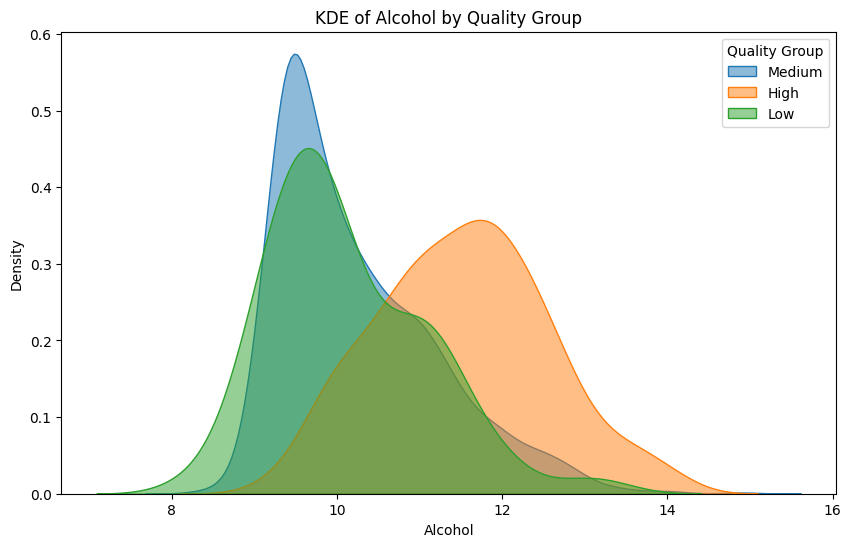

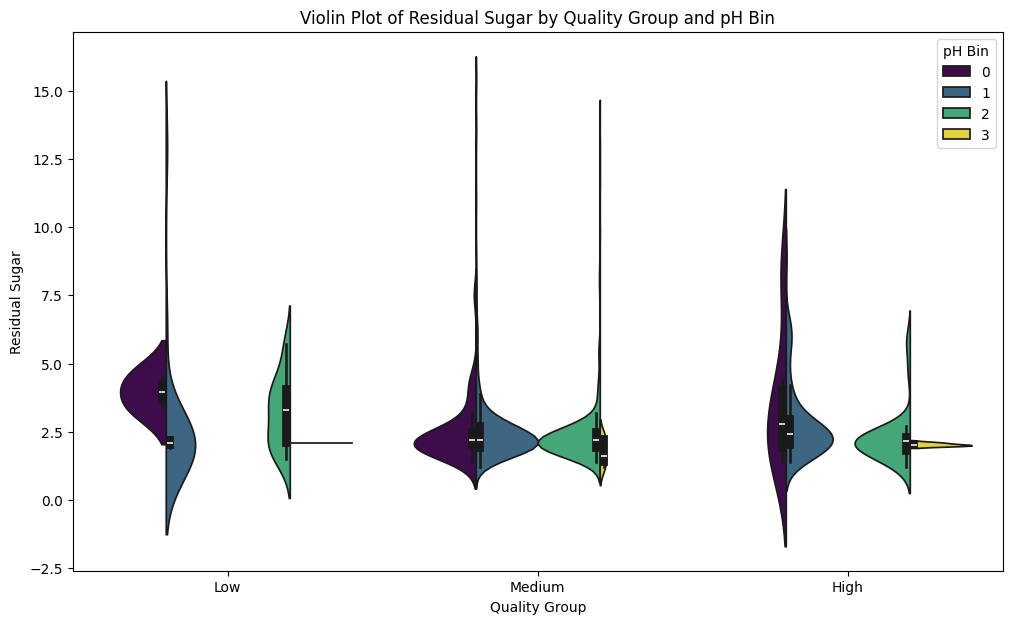

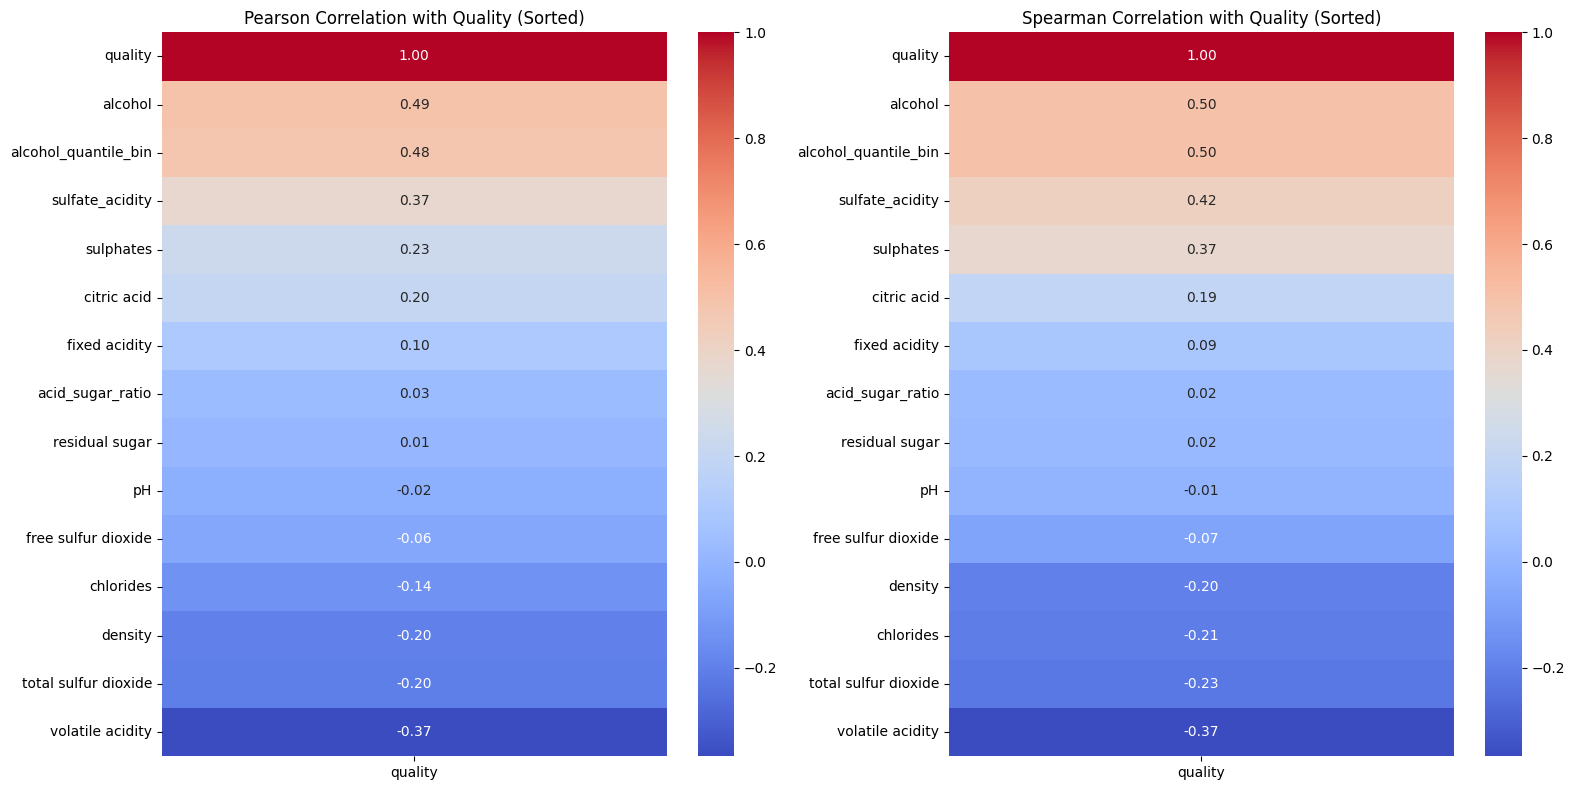

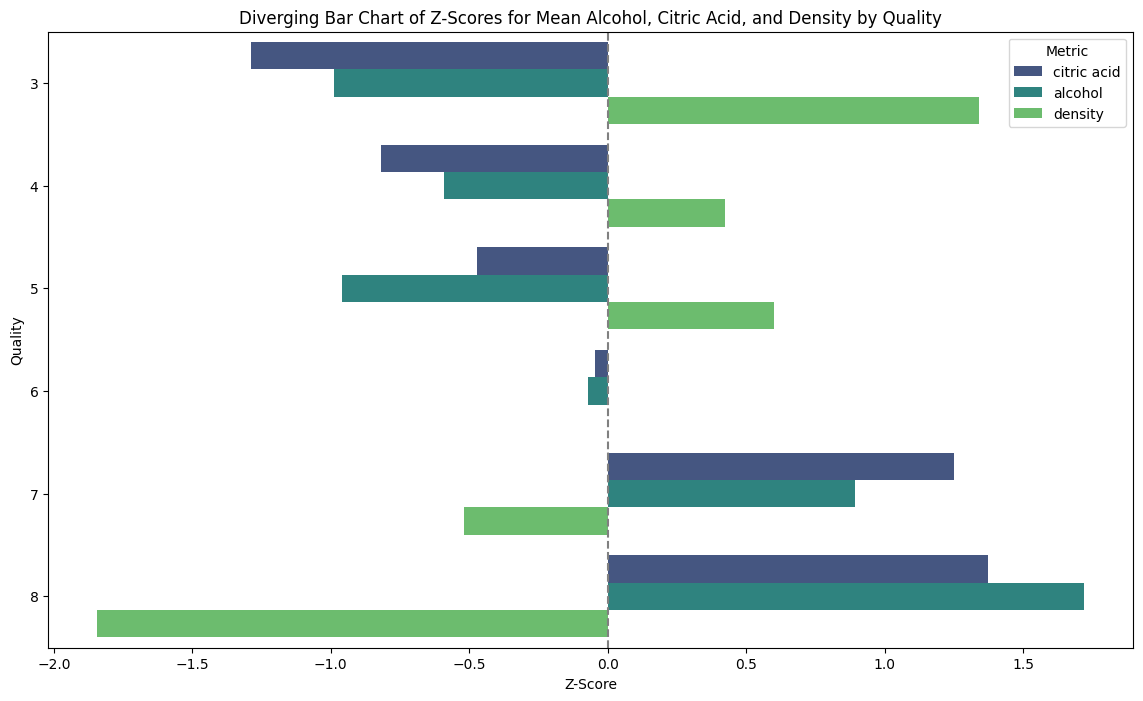

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


plt.figure(figsize=(10, 6))
for group in df['quality_group'].unique():
    sns.kdeplot(df[df['quality_group'] == group]['alcohol'], label=group, fill=True, alpha=0.5)
plt.title('KDE of Alcohol by Quality Group')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.legend(title='Quality Group')
plt.show()

df['pH_bin'] = pd.cut(df['pH'], bins=4, labels=False, duplicates='drop')

plt.figure(figsize=(12, 7))
sns.violinplot(x='quality_group', y='residual sugar', hue='pH_bin', data=df, palette='viridis', split=True)
plt.title('Violin Plot of Residual Sugar by Quality Group and pH Bin')
plt.xlabel('Quality Group')
plt.ylabel('Residual Sugar')
plt.legend(title='pH Bin', loc='upper right')
plt.show()


plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
pearson_corr = df.drop(columns=['quality_group', 'pH_bin']).corr(method='pearson')
pearson_corr_sorted = pearson_corr.sort_values(by='quality', ascending=False)
sns.heatmap(pearson_corr_sorted[['quality']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation with Quality (Sorted)')


plt.subplot(1, 2, 2)
spearman_corr = df.drop(columns=['quality_group', 'pH_bin']).corr(method='spearman')
spearman_corr_sorted = spearman_corr.sort_values(by='quality', ascending=False)
sns.heatmap(spearman_corr_sorted[['quality']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation with Quality (Sorted)')

plt.tight_layout()
plt.show()


metrics = ['alcohol', 'citric acid', 'density']
quality_means = df.groupby('quality')[metrics].mean()


zscore_df = quality_means.apply(zscore)


zscore_unstacked = zscore_df.stack().reset_index(name='Z_Score')
zscore_unstacked.rename(columns={'level_1': 'Metric'}, inplace=True)

# Sort by Z-Score for better visualization
zscore_unstacked = zscore_unstacked.sort_values('Z_Score')

plt.figure(figsize=(14, 8))
sns.barplot(x='Z_Score', y='quality', hue='Metric', data=zscore_unstacked, palette='viridis', orient='h')
plt.title('Diverging Bar Chart of Z-Scores for Mean Alcohol, Citric Acid, and Density by Quality')
plt.xlabel('Z-Score')
plt.ylabel('Quality')
plt.axvline(0, color='grey', linestyle='--') # Add a line at Z=0
plt.legend(title='Metric')
plt.show()

## 🔬 Part 4: Outlier Strategies and Detection (30 mins)

Implement 3 different outlier detection methods on total sulfur dioxide:

IQR method

Z-score method (NumPy)

MAD (Median Absolute Deviation)

Compare how many outliers are detected per method and create a Venn diagram of overlapping ones (use set logic).

Remove the most extreme outliers (intersection of all methods) and compare group-wise means before and after.

Number of outliers detected by IQR method: 42
Number of outliers detected by Z-score method: 12
Number of outliers detected by MAD method: 91


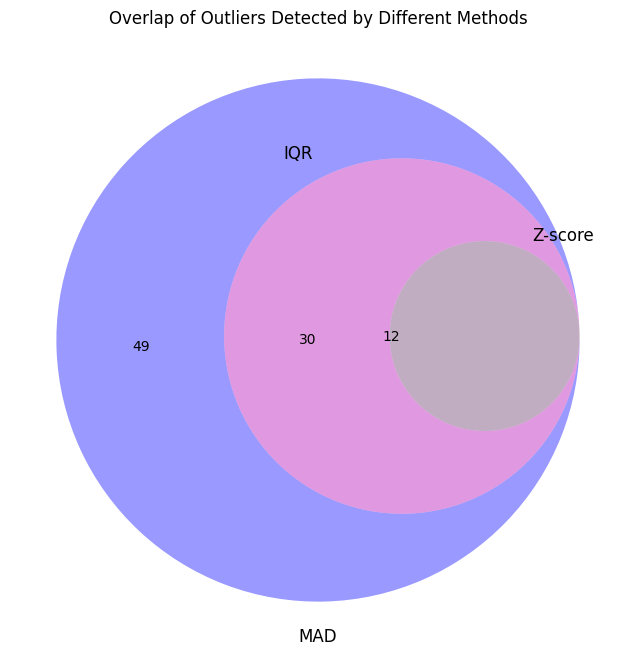


Number of extreme outliers (intersection of all methods): 12

Group-wise means before removing extreme outliers:
quality_group
Low       39.276596
Medium    50.327908
High      36.619884
Name: total sulfur dioxide, dtype: float32

Group-wise means after removing extreme outliers:
quality_group
Low       39.276596
Medium    49.361973
High      33.698223
Name: total sulfur dioxide, dtype: float32

Original number of rows: 1293
Number of rows after removing extreme outliers: 1281


/tmp/ipython-input-7-2775557902.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('quality_group')['total sulfur dioxide'].mean())
/tmp/ipython-input-7-2775557902.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_cleaned.groupby('quality_group')['total sulfur dioxide'].mean())


In [7]:

!pip install matplotlib-venn

from matplotlib_venn import venn3

# Outlier detection methods for 'total sulfur dioxide'

# IQR method
Q1 = df['total sulfur dioxide'].quantile(0.25)
Q3 = df['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
outliers_iqr_indices = set(df[(df['total sulfur dioxide'] < lower_bound_iqr) | (df['total sulfur dioxide'] > upper_bound_iqr)].index)
print(f"Number of outliers detected by IQR method: {len(outliers_iqr_indices)}")

# Z-score method
z_scores = np.abs(zscore(df['total sulfur dioxide']))
outliers_zscore_indices = set(df[z_scores > 3].index)
print(f"Number of outliers detected by Z-score method: {len(outliers_zscore_indices)}")

# MAD (Median Absolute Deviation) method
median = df['total sulfur dioxide'].median()
mad = np.median(np.abs(df['total sulfur dioxide'] - median))
# A common threshold for MAD based outlier detection is 3.5 * MAD
mad_threshold = 3.5 * mad
outliers_mad_indices = set(df[np.abs(df['total sulfur dioxide'] - median) > mad_threshold].index)
print(f"Number of outliers detected by MAD method: {len(outliers_mad_indices)}")


# Venn diagram of overlapping outliers
plt.figure(figsize=(8, 8))
venn3([outliers_iqr_indices, outliers_zscore_indices, outliers_mad_indices],
      ('IQR', 'Z-score', 'MAD'))
plt.title('Overlap of Outliers Detected by Different Methods')
plt.show()

# Remove the most extreme outliers (intersection of all methods)
extreme_outliers_indices = outliers_iqr_indices.intersection(outliers_zscore_indices, outliers_mad_indices)
print(f"\nNumber of extreme outliers (intersection of all methods): {len(extreme_outliers_indices)}")

df_cleaned = df.drop(extreme_outliers_indices)

# Compare group-wise means before and after removal
print("\nGroup-wise means before removing extreme outliers:")
print(df.groupby('quality_group')['total sulfur dioxide'].mean())

print("\nGroup-wise means after removing extreme outliers:")
print(df_cleaned.groupby('quality_group')['total sulfur dioxide'].mean())

print(f"\nOriginal number of rows: {len(df)}")
print(f"Number of rows after removing extreme outliers: {len(df_cleaned)}")

## ⚙️ Part 5: Functionalized Insights + Summary (30 mins)

Create a reusable function feature_stats(df, col) that returns:

Skewness, kurtosis, 95th percentile, and missing %.

Create a decorator @timeit to time the execution of heavy visualizations (matplotlib, seaborn).

Build a final dashboard with subplots using matplotlib:

Histograms of top 3 correlated features with quality.

A single pairplot of only High and Low quality wines with citric acid, alcohol, and pH.


Feature Statistics for 'alcohol':
{'Skewness': np.float32(0.88971615), 'Kurtosis': np.float32(0.2517444), '95th Percentile': np.float64(12.5), 'Missing %': np.float64(0.0)}

Feature Statistics for 'volatile acidity':
{'Skewness': np.float64(0.4221234836752425), 'Kurtosis': np.float64(-0.13033745495798144), '95th Percentile': np.float64(0.8399999737739563), 'Missing %': np.float64(0.0)}

Generating Dashboard:


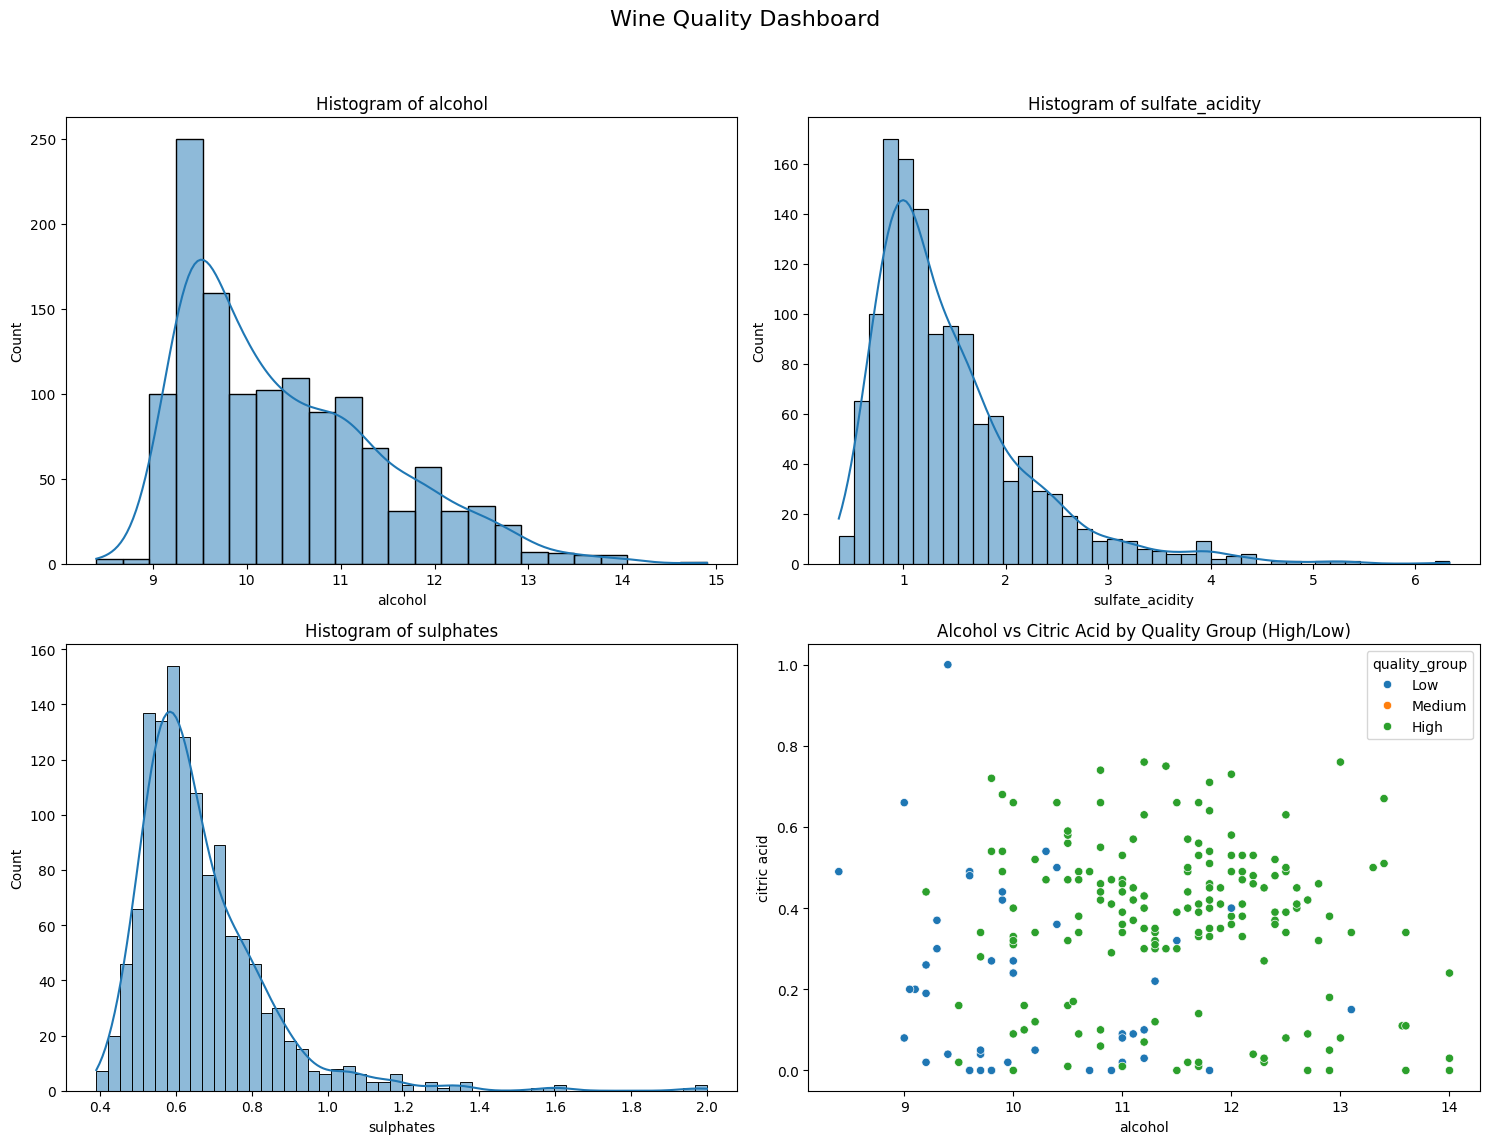

Function 'plot_dashboard' took 1.1309 seconds to execute.


In [9]:
# prompt: Create a reusable function feature_stats(df, col) that returns:
# Skewness, kurtosis, 95th percentile, and missing %.
# Create a decorator @timeit to time the execution of heavy visualizations (matplotlib, seaborn).
# Build a final dashboard with subplots using matplotlib:
# Histograms of top 3 correlated features with quality.
# A single pairplot of only High and Low quality wines with citric acid, alcohol, and pH.

import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

def feature_stats(df, col):
    """
    Calculates descriptive statistics for a given column in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        col (str): The name of the column to analyze.

    Returns:
        dict: A dictionary containing the skewness, kurtosis, 95th percentile,
              and missing percentage of the column.
    """
    stats = {}
    if col in df.columns:
        stats['Skewness'] = df[col].skew()
        stats['Kurtosis'] = df[col].kurtosis()
        stats['95th Percentile'] = df[col].quantile(0.95)
        stats['Missing %'] = df[col].isnull().sum() / len(df) * 100
    else:
        print(f"Column '{col}' not found in the DataFrame.")
    return stats

def timeit(func):
    """
    Decorator to measure the execution time of a function.
    """
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Function '{func.__name__}' took {end_time - start_time:.4f} seconds to execute.")
        return result
    return wrapper

@timeit
def plot_dashboard(df):
    """
    Builds a dashboard with subplots.

    Args:
        df (pd.DataFrame): The input DataFrame.
    """
    # Calculate correlations with quality and get top 3
    correlations = df.drop(columns=['quality_group', 'pH_bin', 'alcohol_quantile_bin']).corr()['quality'].sort_values(ascending=False)
    top_3_correlated_features = correlations[1:4].index.tolist() # Exclude quality itself

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Wine Quality Dashboard', fontsize=16)

    # Histograms of top 3 correlated features
    for i, col in enumerate(top_3_correlated_features):
        if i < 2:
            sns.histplot(df[col], ax=axes[0, i], kde=True)
            axes[0, i].set_title(f'Histogram of {col}')
        else:
            sns.histplot(df[col], ax=axes[1, 0], kde=True)
            axes[1, 0].set_title(f'Histogram of {col}')


    # Pairplot for High and Low quality wines
    # Select relevant columns and filter for High and Low quality
    pairplot_df = df[(df['quality_group'] == 'High') | (df['quality_group'] == 'Low')][['citric acid', 'alcohol', 'pH', 'quality_group']]

    # Using seaborn.pairplot directly might interfere with subplot structure.
    # Create the pairplot on a separate figure and then use it, or generate plots individually.
    # For simplicity and maintaining subplot structure, let's generate scatter plots here.

    # Placeholder for the pairplot location or a single scatter plot
    # A full pairplot in a single subplot cell is challenging.
    # Let's create a single scatter plot for two features and show quality group.
    sns.scatterplot(data=pairplot_df, x='alcohol', y='citric acid', hue='quality_group', ax=axes[1, 1])
    axes[1, 1].set_title('Alcohol vs Citric Acid by Quality Group (High/Low)')

    # Adding another scatter plot for diversity
    # sns.scatterplot(data=pairplot_df, x='alcohol', y='pH', hue='quality_group', ax=axes[1, 1])
    # axes[1, 1].set_title('Alcohol vs pH by Quality Group (High/Low)')


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage of feature_stats
print("\nFeature Statistics for 'alcohol':")
print(feature_stats(df, 'alcohol'))

print("\nFeature Statistics for 'volatile acidity':")
print(feature_stats(df, 'volatile acidity'))

# Example usage of the decorator and dashboard plotting
print("\nGenerating Dashboard:")
plot_dashboard(df_cleaned) # Use the cleaned DataFrame